## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:

1. BI-RADS assessment: 1 to 5 (ordinal)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal)

BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

Several different supervised machine learning techniques as mentioned below are applied to this data set and accuracy is measured with K-Fold cross validation (K=10).

Decision tree
Random forest
KNN
Naive Bayes
SVM
Logistic Regression
And, as a bonus challenge, a neural network using Keras.
The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

## Preparing the data

Importing the mammographic_masses.data.txt file into Pandas dataframe

In [17]:
import pandas as pd
import numpy as np
import sklearn as sc

In [18]:
df = pd.read_csv('mammographic_masses.data.txt',header=None,na_values=['?'])
df.head()

,0,1,2,3,4,5
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [19]:
df.shape

(961, 6)

In [20]:
df = df.dropna()

In [21]:
df.describe()

,0,1,2,3,4,5
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 960
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       830 non-null    float64
 1   1       830 non-null    float64
 2   2       830 non-null    float64
 3   3       830 non-null    float64
 4   4       830 non-null    float64
 5   5       830 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.4 KB


In [23]:
X = df.iloc[:, 1:5].values      # 1st to 4th column
y = df.iloc[:, 5].values             # 5th column

In [24]:
X

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [25]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

## Normalizing input data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## Decision Tree

Splitting the data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42) 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree Classifier
clf = DecisionTreeClassifier()

#Train the classifier on training data
clf.fit(X_train, y_train)

# Predict the labels for testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Trees:' ,accuracy_dt)

Accuracy of Decision Trees: 0.7788461538461539


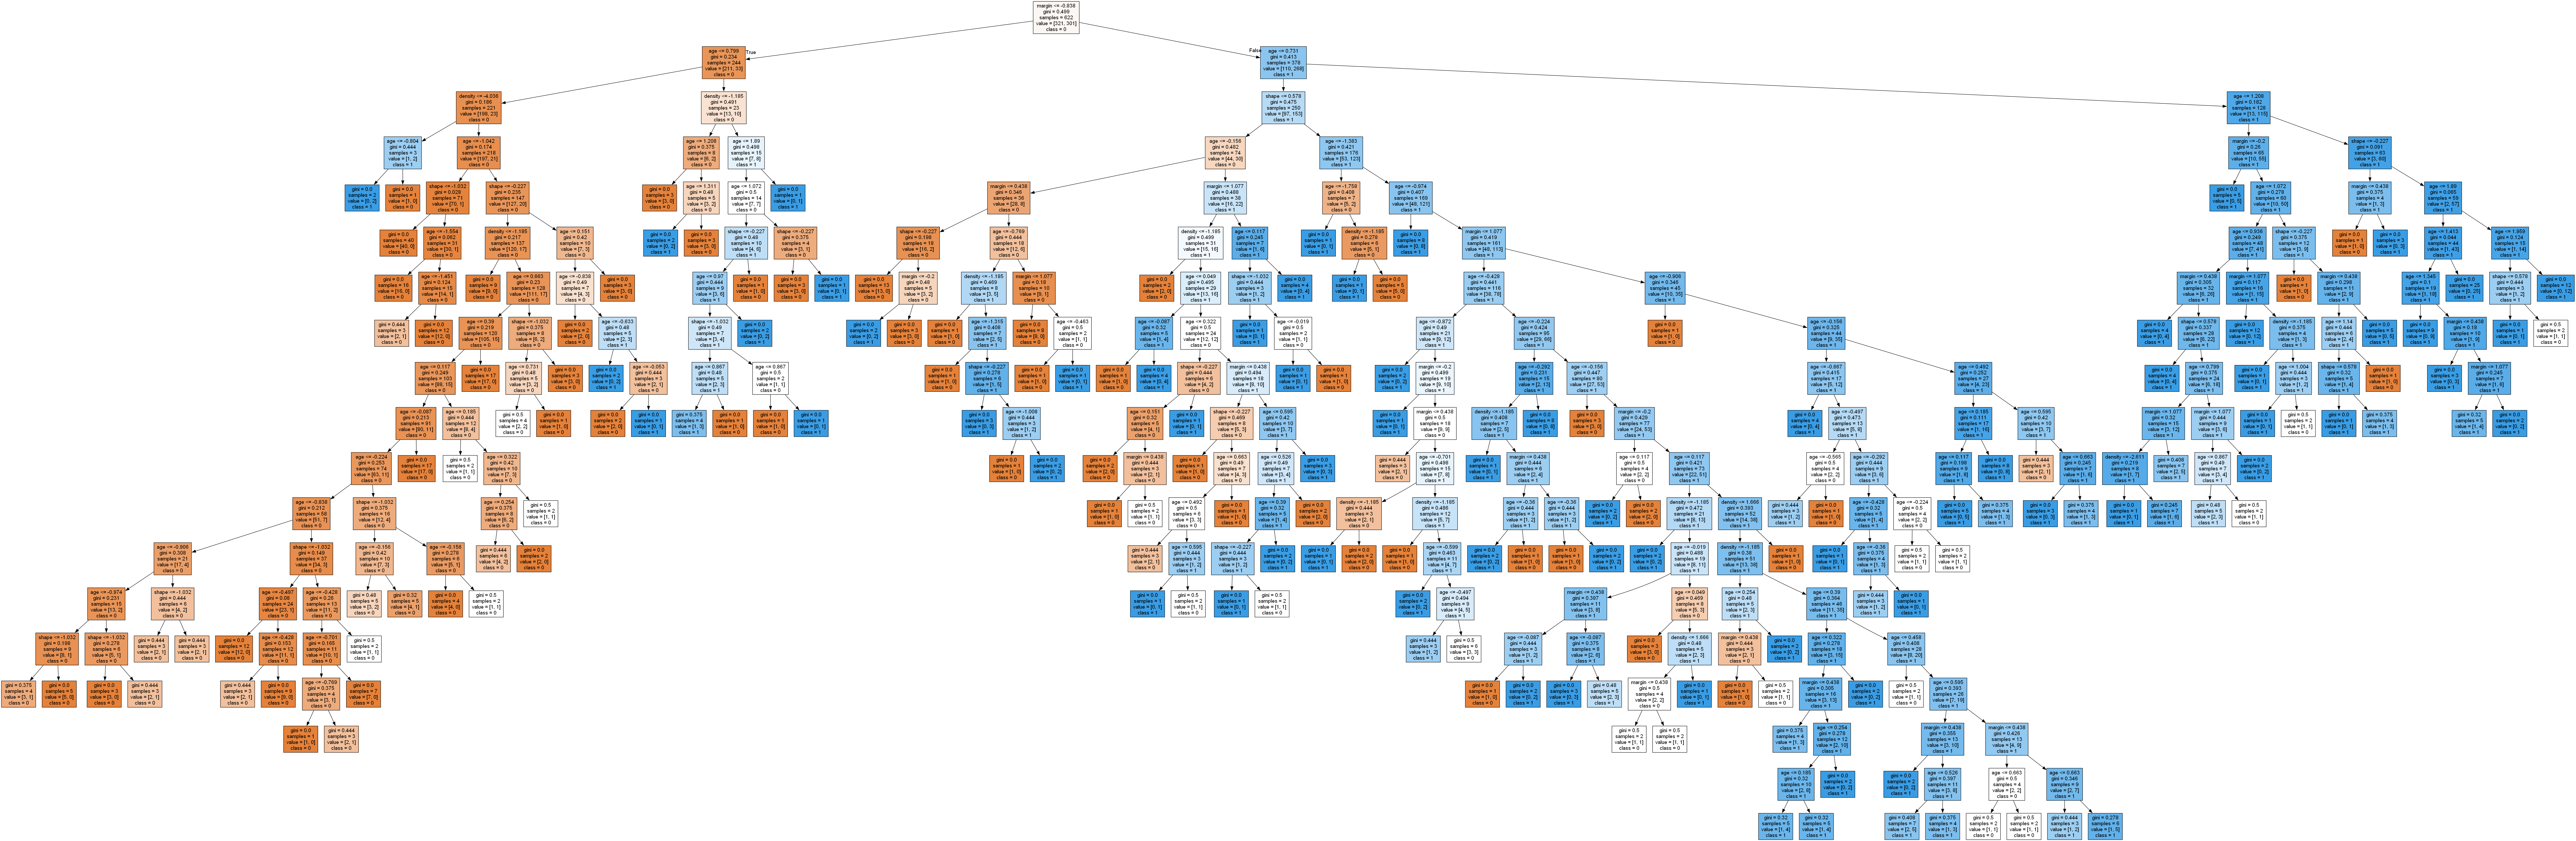

In [30]:
import os
from sklearn.tree import export_graphviz
from IPython.display import Image
import io
from sklearn import tree
from pydotplus import graph_from_dot_data
import graphviz

## Set the PATH environment variable to include the Graphviz bin directory
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Generate the Graphviz representation of the decision tree
feature_names = ['age', 'shape', 'margin', 'density']
class_names = ['0', '1']
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=class_names, filled=True)

# Create a Digraph object from graphviz
graph = graphviz.Source(dot_data)

# Render the decision tree as a PNG image
image = Image(graph.render(format='png'))
display(image)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Define the number of folds (K)
k = 10

# Perform K-fold cross-validation
scores = cross_val_score(clf, X_scaled, y, cv=10)       
# Print the average accuracy across all folds
print("Average Accuracy: ", scores.mean())

Average Accuracy:  0.7397590361445783


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with 10 estimators
clf_rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Fit the classifier on the training data
clf_rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf_rf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy_rf = accuracy_score(y_test, y_pred)
print('accuracy',accuracy_rf)

# Perform K-fold cross-validation
scores = cross_val_score(clf_rf, X_scaled, y, cv=10)

# Calculate the average accuracy across all folds
average_accuracy = scores.mean()
print("k fold",average_accuracy)

accuracy 0.75
k fold 0.7421686746987952


## SUPPORT VECTOR MACHINE (SVM)

In [78]:
# with linear kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM classifier
clf_svm_linear = SVC(kernel = 'linear')

# Fit the classifier to the training data
clf_svm_linear.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf_svm_linear.predict(X_test)

# Accuracy
accuracy_svm_linear = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(clf_svm_linear, X_scaled, y, cv=10)
cv_scores.mean()

print('Accuracy of SVM with linear kernel:' ,accuracy_svm_linear)
print('Cross Value Score:' ,cv_scores.mean())

Accuracy of SVM with linear kernel: 0.8413461538461539
Cross Value Score: 0.7975903614457832


In [79]:
# with Radial Basis Function (RBF) kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM classifier
clf_svm_rbf = SVC(kernel = 'rbf')

# Fit the classifier to the training data
clf_svm_rbf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf_svm_rbf.predict(X_test)

# Accuracy
accuracy_svm_rbf = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(clf_svm_rbf, X_scaled, y, cv=10)
cv_scores.mean()

print('Accuracy of SVM with RBF kernel:' ,accuracy_svm_rbf)
print('Cross Value Score:' ,cv_scores.mean())

Accuracy of SVM with RBF kernel: 0.8317307692307693
Cross Value Score: 0.8012048192771084


In [80]:
# with Sigmoid (RBF) kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM classifier
clf_svm_sigmoid = SVC(kernel = 'sigmoid')

# Fit the classifier to the training data
clf_svm_sigmoid.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf_svm_sigmoid.predict(X_test)

# Accuracy
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(clf_svm_sigmoid, X_scaled, y, cv=10)
cv_scores.mean()

print('Accuracy of SVM with sigmoid kernel:' ,accuracy_svm_sigmoid)
print('Cross Value Score:' ,cv_scores.mean())

Accuracy of SVM with sigmoid kernel: 0.7596153846153846
Cross Value Score: 0.7457831325301204


In [81]:
# with polynomial kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM classifier
clf_svm_poly = SVC(kernel = 'poly')

# Fit the classifier to the training data
clf_svm_poly.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf_svm_poly.predict(X_test)

# Accuracy
accuracy_svm_poly = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(clf_svm_poly, X_scaled, y, cv=10)
cv_scores.mean()

print('Accuracy of SVM with Polynomial kernel:' ,accuracy_svm_poly)
print('Cross Value Score:' ,cv_scores.mean())

Accuracy of SVM with Polynomial kernel: 0.8076923076923077
Cross Value Score: 0.7903614457831326


## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 1
max_acc = 0

for i in range(1,60):

    # create an instance of the KNN classifier
    clf_knn = KNeighborsClassifier(n_neighbors=k)

    # fit the classifier to the training data
    clf_knn.fit(X_train, y_train)

    # predict the labels for the test data
    y_pred = clf_knn.predict(X_test)
    cv_scores = cross_val_score(clf_knn, X_scaled, y, cv=10)
    cv_scores.mean()

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(clf_knn, X_scaled, y, cv=10)
    cv_scores.mean()
    if cv_scores.mean() > max_acc:
        max_acc = cv_scores.mean()
        kmax = k
    k=k+1
    
kmax,max_acc

(59, 0.8012048192771084)

In [54]:
clf_knn = KNeighborsClassifier(n_neighbors=kmax)

# Fit the classifier to the training data
clf_knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf_knn.predict(X_test)

# Calculate the accuracy of the predictions
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of KNN:' ,accuracy_knn)

Accuracy of KNN: 0.8365384615384616


## NAIVE BAYES

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes Classifier
clf_nb = GaussianNB()

# Fit the classifier to the training data
clf_nb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf_nb.predict(X_test)

# accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print('Accuracy of Naive Bayes:' ,accuracy_nb)

Accuracy of Naive Bayes: 0.8269230769230769


In [56]:
cv = cross_val_score(clf_nb, X_scaled, y, cv=10)
cv_scores.mean()

0.8012048192771084

## LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LR classifier
clf_lr = LogisticRegression()

# fit the classifier to the training data
clf_lr.fit(X_train, y_train)

# predict the labels for the test data
y_pred = clf_lr.predict(X_test)

# accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(clf_lr, X_scaled, y, cv=10)

print('Accuracy of Logistic Regression:' ,accuracy_lr)
print('cv score:' , cv_scores.mean())                    

Accuracy of Logistic Regression: 0.8221153846153846
cv score: 0.8072289156626505


## NEURAL NETWORKS

In [68]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [70]:
from keras.callbacks import EarlyStopping

# define the EarlyStopping callback
early_stopping = EarlyStopping(monitor = 'accuracy', patience=50)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=500, callbacks=[early_stopping])

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6216 - loss: 0.6710
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.5432 
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4804 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4739 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4567 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4783 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4709 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4521 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4390 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4281 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4357 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [73]:
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_nn = []
for i in range(0, len(y_pred)):
    if y_pred[i] < 0.4:
        y_pred_nn.append(0)
    else:
        y_pred_nn.append(1)

# accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print('Accuracy of Neural Network:' ,accuracy_nn)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 1.0382 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.3493 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy of Neural Network: 0.8221153846153846


## Summaring the results of all models

In [87]:
print("Accuracy of each model :")
print('-' *50)
print("Decision Tree:",np.round(accuracy_dt,3))
print("SVM linear:",np.round(accuracy_svm_linear,3))
print("SVM rbf:",np.round(accuracy_svm_rbf,3))
print("SVM sigmoid:",np.round(accuracy_svm_sigmoid,3))
print("SVM poly:",np.round(accuracy_svm_poly,3))
print("KNN:",np.round(accuracy_knn,3))
print("NAIVE Bayes :",np.round(accuracy_nb,3))
print("Logistic Regression:",np.round(accuracy_lr,3))
print("Neural Network:",np.round(accuracy_nn,3))

Accuracy of each model :
--------------------------------------------------
Decision Tree: 0.779
SVM linear: 0.841
SVM rbf: 0.832
SVM sigmoid: 0.76
SVM poly: 0.808
KNN: 0.837
NAIVE Bayes : 0.827
Logistic Regression: 0.822
Neural Network: 0.822
